In [2]:
import csv
import torch
import numpy as np
import pandas as pd
import copy
import networkx as nx
import random
import matplotlib.pyplot as plt
from math import sqrt 


In [3]:
# Load the CSV file into a DataFrame
data = pd.read_csv("train.csv")

# Display the first five rows of the DataFrame
print(data.shape)
data.head()

(1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
# show distributaion of the data
print(data.min(axis=0))
print(data.max(axis=0))

id                              id0000001
vendor_id                               1
pickup_datetime       2016-01-01 00:00:17
dropoff_datetime      2016-01-01 00:03:31
passenger_count                         0
pickup_longitude              -121.933342
pickup_latitude                 34.359695
dropoff_longitude             -121.933304
dropoff_latitude                32.181141
store_and_fwd_flag                      N
trip_duration                           1
dtype: object
id                              id4000000
vendor_id                               2
pickup_datetime       2016-06-30 23:59:39
dropoff_datetime      2016-07-01 23:02:03
passenger_count                         9
pickup_longitude               -61.335529
pickup_latitude                 51.881084
dropoff_longitude              -61.335529
dropoff_latitude                43.921028
store_and_fwd_flag                      Y
trip_duration                     3526282
dtype: object


In [5]:
data2=copy.deepcopy(data)
data2['pickup_longitude'] = data['pickup_longitude'].round(2)
data2['pickup_latitude'] = data['pickup_latitude'].round(2)
data2['dropoff_longitude'] = data['dropoff_longitude'].round(2)
data2['dropoff_latitude'] = data['dropoff_latitude'].round(2)

data2.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435


In [6]:
# Create a directed graph
G2 = nx.DiGraph()
selfloops = 0
# Add edges to the graph
for row in data2.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration
    if (source != destination):
      G2.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1

print(f'num of self loops in data2 = {selfloops}')

num of self loops in data2 = 72307


In [7]:
dataOneHour2=copy.deepcopy(data2)
dataOneHour2 = dataOneHour2[(dataOneHour2['pickup_datetime'] >= '2016-01-04 08:00:00') & (dataOneHour2['pickup_datetime'] <= '2016-01-04 09:30:00')]

In [8]:
dataOneHour2.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1695,id1261506,2,2016-01-04 08:45:43,2016-01-04 08:57:27,2,-73.99,40.74,-73.97,40.76,N,704
3560,id3277602,1,2016-01-04 08:02:30,2016-01-04 08:11:54,2,-73.97,40.76,-74.00,40.74,N,564
12507,id2934301,1,2016-01-04 09:10:50,2016-01-04 09:22:16,1,-73.98,40.73,-73.98,40.75,N,686
14435,id2988116,2,2016-01-04 08:44:18,2016-01-04 09:02:44,4,-73.95,40.78,-73.98,40.76,N,1106
14852,id3771820,2,2016-01-04 08:46:00,2016-01-04 08:55:04,1,-73.94,40.75,-73.95,40.74,N,544


In [9]:
# Convert the pickup and dropoff timestamps to datetime objects
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [10]:
# Round the coordinates to 3 decimal places
data['pickup_longitude'] = data['pickup_longitude'].round(3)
data['pickup_latitude'] = data['pickup_latitude'].round(3)
data['dropoff_longitude'] = data['dropoff_longitude'].round(3)
data['dropoff_latitude'] = data['dropoff_latitude'].round(3)

In [11]:
G3 = nx.DiGraph()

selfloops = 0
# Add edges to the graph
for row in data.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration
    if (source != destination):
      G3.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1


print(f'num of self loops in data = {selfloops}')

num of self loops in data = 10764


In [12]:
min_weight = min(nx.get_edge_attributes(G3, 'weight').values())
max_weight = max(nx.get_edge_attributes(G3, 'weight').values())

print(f"Minimum weight: {min_weight}")
print(f"Maximum weight: {max_weight}")

Minimum weight: 1
Maximum weight: 3526282


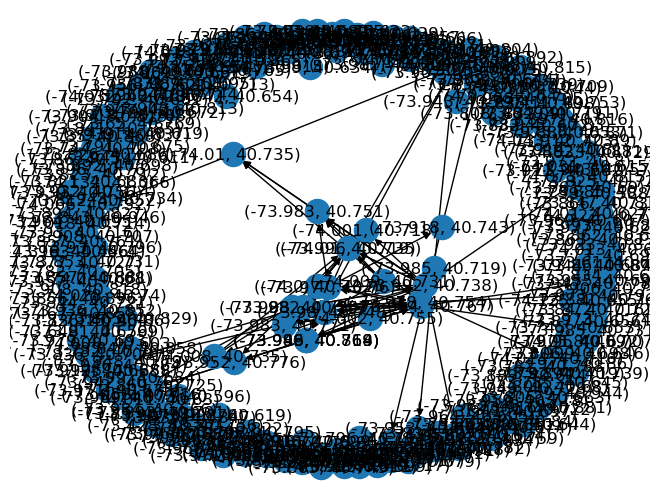

In [13]:
subgraph = G3.subgraph(random.sample(G3.nodes(), 300))

# Plot the subgraph
nx.draw(subgraph, with_labels=True)
plt.show()


In [14]:

# Convert the pickup and dropoff timestamps to datetime objects
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [15]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [16]:
dataOneHour=copy.deepcopy(data)
dataOneHour = dataOneHour[(dataOneHour['pickup_datetime'] >= '2016-01-04 08:00:00') & (dataOneHour['pickup_datetime'] <= '2016-01-04 09:00:00')]

In [17]:
dataOneHour.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1695,id1261506,2,2016-01-04 08:45:43,2016-01-04 08:57:27,2,-73.987,40.737,-73.972,40.760,N,704
3560,id3277602,1,2016-01-04 08:02:30,2016-01-04 08:11:54,2,-73.971,40.762,-73.996,40.736,N,564
14435,id2988116,2,2016-01-04 08:44:18,2016-01-04 09:02:44,4,-73.952,40.778,-73.981,40.764,N,1106
14852,id3771820,2,2016-01-04 08:46:00,2016-01-04 08:55:04,1,-73.938,40.750,-73.954,40.745,N,544
20689,id0344937,2,2016-01-04 08:44:24,2016-01-04 09:06:09,5,-74.000,40.684,-73.989,40.737,N,1305


In [18]:
G = nx.DiGraph()

selfloops = 0
# Add edges to the graph
for row in dataOneHour.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration
    if (source != destination):
      G.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1

print(f'num of self loops in one hour = {selfloops}')

num of self loops in one hour = 4


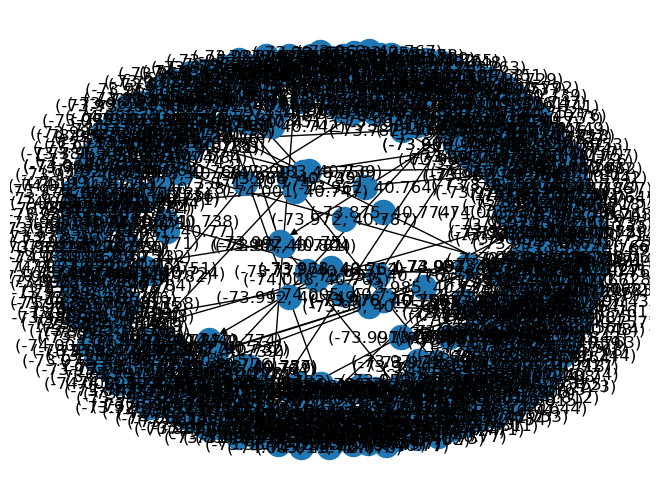

In [19]:
# Plot the subgraph
nx.draw(G, with_labels=True)
plt.show()

In [20]:
num_edges = G.number_of_edges()
print(f"Number of edges in the graph: {num_edges}")

num_nodes = G.number_of_nodes()
print(f"Number of nodes in the graph: {num_nodes}")

Number of edges in the graph: 389
Number of nodes in the graph: 618


In [21]:
len(dataOneHour)

393

In [22]:
data2_5=copy.deepcopy(data)
data2_5['pickup_longitude'] = data2_5['pickup_longitude'].apply(lambda x: round(x / 0.005) * 0.005)
data2_5['pickup_latitude'] = data2_5['pickup_latitude'].apply(lambda x: round(x / 0.005) * 0.005)
data2_5['dropoff_longitude'] = data2_5['dropoff_longitude'].apply(lambda x: round(x / 0.005) * 0.005)
data2_5['dropoff_latitude'] = data2_5['dropoff_latitude'].apply(lambda x: round(x / 0.005) *0.005)


In [23]:
# creating data for 1.5 hours : 
dataOneHour2=copy.deepcopy(data2_5)
dataOneHour2 = dataOneHour2[(dataOneHour2['pickup_datetime'] >= '2016-01-04 08:00:00') & (dataOneHour2['pickup_datetime'] <= '2016-01-04 09:30:00')]

In [24]:
# Create a directed graph
G25 = nx.DiGraph()
selfloops = 0
# Add edges to the graph
for row in dataOneHour2.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration
    if (source != destination):
      G25.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1

print(f'num of self loops in data2 = {selfloops}')

num of self loops in data2 = 6


In [25]:
num_edges = G25.number_of_edges()
print(f"Number of edges in the graph: {num_edges}")

num_nodes = G25.number_of_nodes()
print(f"Number of nodes in the graph: {num_nodes}")

Number of edges in the graph: 544
Number of nodes in the graph: 212


In [29]:
dataOneHour2.to_csv('dataset/traffic/spatial/data_8_930.csv', index=False)


In [30]:
dataOneHour2.shape

(583, 11)

In [31]:
# Load the CSV file into a DataFrame
newdata = pd.read_csv("dataset/traffic/spatial/data_8_930.csv")

# Display the first five rows of the DataFrame
print(newdata.shape)
newdata.head()

(583, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1261506,2,2016-01-04 08:45:43,2016-01-04 08:57:27,2,-73.985,40.735,-73.970,40.760,N,704
1,id3277602,1,2016-01-04 08:02:30,2016-01-04 08:11:54,2,-73.970,40.760,-73.995,40.735,N,564
2,id2934301,1,2016-01-04 09:10:50,2016-01-04 09:22:16,1,-73.980,40.730,-73.985,40.745,N,686
3,id2988116,2,2016-01-04 08:44:18,2016-01-04 09:02:44,4,-73.950,40.780,-73.980,40.765,N,1106
4,id3771820,2,2016-01-04 08:46:00,2016-01-04 08:55:04,1,-73.940,40.750,-73.955,40.745,N,544


In [32]:
def calc_air_distance(lat1, lon1, lat2, lon2):
    # Assuming 1 degree of latitude and longitude is approximately 111 kilometers
    lat_km = 111.0
    lon_km = 90.0

    # Calculate the difference in coordinates
    delta_lat = lat2 - lat1
    delta_lon = lon2 - lon1

    # Calculate the distance using Euclidean distance formula
    distance = sqrt((delta_lat * lat_km)**2 + (delta_lon * lon_km)**2)
    return distance

In [33]:
G = nx.DiGraph()
selfloops =0
# Add edges to the graph
for row in newdata.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    distance = calc_air_distance(row.dropoff_latitude, row.dropoff_longitude, row.pickup_latitude, row.pickup_longitude)
    weight =3600*( distance /row.trip_duration )
    if (source != destination):
      G.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1
print(f'num of self loops in data2 = {selfloops}')

num of self loops in data2 = 6


In [34]:
num_edges = G.number_of_edges()
print(f"Number of edges in the graph: {num_edges}")

num_nodes = G.number_of_nodes()
print(f"Number of nodes in the graph: {num_nodes}")

Number of edges in the graph: 544
Number of nodes in the graph: 212


In [36]:
# Create an empty features matrix
features_matrix = np.zeros((num_nodes, 4))

# Loop through each node
for i, node in enumerate(G.nodes()):
    # Get the node attributes
    longitude = node[0]
    latitude = node[1]
    
    # Calculate the average weight of all edges from the node
    traffic_from_avg = np.mean([edge[2]['weight'] for edge in G.out_edges(node, data=True)])
    
    # Calculate the average weight of all edges into the node
    traffic_into_avg = np.mean([edge[2]['weight'] for edge in G.in_edges(node, data=True)])
    
    # Assign the features to the features matrix
    features_matrix[i] = [longitude, latitude, traffic_from_avg, traffic_into_avg]  # Add the two additional features here
# Print the features matrix
print(features_matrix)


[[-73.985       40.735       14.02726702  11.53453745]
 [-73.97        40.76        13.35018227  12.44947093]
 [-73.995       40.735        8.25382324  18.89563265]
 [-73.98        40.73        11.03850158  21.12133964]
 [-73.985       40.745       14.80052956   9.02839112]
 [-73.95        40.78        10.32510284  18.84235057]
 [-73.98        40.765       11.6309462   10.96983143]
 [-73.94        40.75        10.16905985          nan]
 [-73.955       40.745        5.03508101   9.65932811]
 [-73.955       40.78        11.02251571  13.6549459 ]
 [-73.96        40.8                 nan  13.06816732]
 [-73.985       40.75         9.98646514  11.2661615 ]
 [-73.975       40.765       14.00755375  12.02123031]
 [-74.          40.685       15.51034329          nan]
 [-73.99        40.735       13.82449257  13.33164136]
 [-73.975       40.795       24.49938859          nan]
 [-73.98        40.785       12.9794645   16.65367151]
 [-73.98        40.74        13.57687372  15.1778778 ]
 [-73.99  

In [37]:
out_threshold = np.nanpercentile(features_matrix[:,2], 20)
in_threshold = np.nanpercentile(features_matrix[:,3], 20)

In [38]:
print(out_threshold)
print(in_threshold)

10.922526134537744
11.388171233883467


In [ ]:
lables2 = np.zeros((num_nodes, 2))

# Loop through each node
for i, node in enumerate(features_matrix):
    
    traffic_from = 0 if node[2] >= out_threshold else 1
    traffic_into = 0 if node[3] >= in_threshold else 1
    
    lables2[i] = [traffic_from, traffic_into] 
# Print the features matrix
print(lables2)


[[0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 

In [ ]:
new_labels = np.zeros_like(lables2)

new_labels[np.where((lables2[:,0] == 0) & (lables2[:,1] == 0))] = 0
new_labels[np.where((lables2[:,0] == 0) & (lables2[:,1] == 1))] = 1
new_labels[np.where((lables2[:,0] == 1) & (lables2[:,1] == 0))] = 2
new_labels[np.where((lables2[:,0] == 1) & (lables2[:,1] == 1))] = 3

new_labels = new_labels[:,0]

new_labels_df = pd.DataFrame(new_labels)
new_labels_df = new_labels_df.astype(int)
new_labels_df.head()

,0
0,0
1,0
2,2
3,0
4,1


In [ ]:
counts = new_labels_df[0].value_counts()
print(counts)


0    73
2    60
1    56
3    23
Name: 0, dtype: int64


In [ ]:
sorted_labels={}
for index, row in new_labels_df.iterrows():
    sorted_labels[int(index)] = int(row[0])
sorted_labels

{0: 1,
 1: 0,
 2: 2,
 3: 2,
 4: 1,
 5: 2,
 6: 3,
 7: 3,
 8: 3,
 9: 2,
 10: 2,
 11: 3,
 12: 0,
 13: 1,
 14: 0,
 15: 1,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 2,
 21: 1,
 22: 1,
 23: 2,
 24: 3,
 25: 0,
 26: 0,
 27: 1,
 28: 3,
 29: 1,
 30: 0,
 31: 0,
 32: 1,
 33: 1,
 34: 0,
 35: 2,
 36: 0,
 37: 2,
 38: 1,
 39: 2,
 40: 0,
 41: 0,
 42: 1,
 43: 0,
 44: 2,
 45: 0,
 46: 2,
 47: 0,
 48: 2,
 49: 0,
 50: 0,
 51: 3,
 52: 3,
 53: 0,
 54: 2,
 55: 1,
 56: 0,
 57: 2,
 58: 1,
 59: 0,
 60: 2,
 61: 1,
 62: 1,
 63: 0,
 64: 0,
 65: 2,
 66: 1,
 67: 0,
 68: 1,
 69: 0,
 70: 1,
 71: 2,
 72: 1,
 73: 1,
 74: 2,
 75: 1,
 76: 0,
 77: 1,
 78: 1,
 79: 1,
 80: 2,
 81: 3,
 82: 2,
 83: 0,
 84: 2,
 85: 1,
 86: 2,
 87: 0,
 88: 3,
 89: 3,
 90: 1,
 91: 2,
 92: 1,
 93: 1,
 94: 2,
 95: 3,
 96: 3,
 97: 2,
 98: 0,
 99: 0,
 100: 2,
 101: 0,
 102: 2,
 103: 0,
 104: 2,
 105: 0,
 106: 2,
 107: 0,
 108: 1,
 109: 2,
 110: 2,
 111: 2,
 112: 2,
 113: 1,
 114: 1,
 115: 1,
 116: 2,
 117: 0,
 118: 0,
 119: 1,
 120: 3,
 121: 3,
 122: 2,
 12

In [43]:
# A = nx.adjacency_matrix(G, nodelist = sorted(list(sorted_labels.keys())), weight = 'weight')
A = nx.adjacency_matrix(G,  weight = 'weight')
A.shape

(212, 212)

In [45]:
print(A)

  (0, 1)	15.780457287184232
  (0, 11)	10.352331606218009
  (0, 14)	7.67772511847643
  (0, 26)	4.1974789915987865
  (0, 35)	12.840549058546092
  (0, 46)	16.07164583914193
  (0, 64)	9.821821477373463
  (0, 87)	37.14840127871712
  (0, 152)	12.354992527154641
  (1, 2)	22.8035209094334
  (1, 4)	10.275248303265144
  (1, 6)	4.426187495923957
  (1, 33)	11.853627458901402
  (1, 101)	17.392327166785876
  (2, 4)	7.866168680685496
  (2, 58)	14.748362941909168
  (2, 125)	2.1469380972874696
  (3, 4)	9.051109035776324
  (3, 14)	14.753958319731332
  (3, 44)	10.709522750854303
  (3, 112)	7.56763667294612
  (3, 123)	13.110281134472515
  (4, 20)	14.954867201068659
  (4, 32)	9.02479767230023
  (4, 59)	23.598506042033065
  :	:
  (167, 43)	17.577653989015218
  (167, 160)	17.99999999999642
  (168, 11)	8.723747980613398
  (169, 44)	20.166246918859066
  (169, 59)	12.007211538460856
  (169, 195)	17.691107644304047
  (170, 32)	15.380697567712025
  (170, 43)	15.277210837927672
  (171, 172)	18.04038505447679
  (17

In [46]:
# Convert the matrix A to a DataFrame
df_A = pd.DataFrame.sparse.from_spmatrix(A)

# Save the DataFrame as a CSV file
df_A.to_csv('dataset/traffic/spatial/A_matrix.csv', index=True)


In [47]:
# path = 'dataset/spatial'
nx.write_edgelist(G,'dataset/traffic/spatial/traffic.edges', delimiter=',', data=[('weight', float)])


In [48]:
features_matrix.shape

(212, 4)

In [53]:
# Save the attributes to the npz file
np.savez('dataset/traffic/spatial/traffic.npz', adj=A, features=features_matrix, labels=new_labels.astype(int))


NameError: name 'new_labels' is not defined

In [63]:
# Load the npz file
data = np.load('dataset/traffic/spatial/traffic.npz')

# Check if features_matrix has a None value
if np.any(data['features'] is None):
    print("features_matrix has a None value")
else:
    print("features_matrix does not have a None value")


features_matrix does not have a None value


In [67]:
from torch_geometric.data import Data
import scipy.sparse as sp
def sample_per_class(random_state, labels, num_examples_per_class, forbidden_indices=None):
    num_samples = labels.shape[0]
    num_classes = labels.max()+1
    sample_indices_per_class = {index: [] for index in range(num_classes)}

    # get indices sorted by class
    for class_index in range(num_classes):
        for sample_index in range(num_samples):
            if labels[sample_index] == class_index:
                if forbidden_indices is None or sample_index not in forbidden_indices:
                    sample_indices_per_class[class_index].append(sample_index)

    # get specified number of indices for each class
    return np.concatenate(
        [random_state.choice(sample_indices_per_class[class_index], num_examples_per_class, replace=False)
         for class_index in range(len(sample_indices_per_class))
         ])

def get_train_val_test_split(random_state,
                             labels,
                             train_examples_per_class=None, val_examples_per_class=None,
                             test_examples_per_class=None,
                             train_size=None, val_size=None, test_size=None):
    # print(labels.item())
    # print(len(labels.item()))
    # print(type(labels.item()))
    # num_samples = len(labels.item())
    num_samples = labels.shape[0]
    num_classes = labels.max()+1
    remaining_indices = list(range(num_samples))

    if train_examples_per_class is not None:
        train_indices = sample_per_class(
            random_state, labels, train_examples_per_class)
    else:
        # select train examples with no respect to class distribution
        train_indices = random_state.choice(
            remaining_indices, train_size, replace=False)

    if val_examples_per_class is not None:
        val_indices = sample_per_class(
            random_state, labels, val_examples_per_class, forbidden_indices=train_indices)
    else:
        remaining_indices = np.setdiff1d(remaining_indices, train_indices)
        val_indices = random_state.choice(
            remaining_indices, val_size, replace=False)

    forbidden_indices = np.concatenate((train_indices, val_indices))
    if test_examples_per_class is not None:
        test_indices = sample_per_class(random_state, labels, test_examples_per_class,
                                        forbidden_indices=forbidden_indices)
    elif test_size is not None:
        remaining_indices = np.setdiff1d(remaining_indices, forbidden_indices)
        test_indices = random_state.choice(
            remaining_indices, test_size, replace=False)
    else:
        test_indices = np.setdiff1d(remaining_indices, forbidden_indices)

    # assert that there are no duplicates in sets
    assert len(set(train_indices)) == len(train_indices)
    assert len(set(val_indices)) == len(val_indices)
    assert len(set(test_indices)) == len(test_indices)
    # assert sets are mutually exclusive
    assert len(set(train_indices) - set(val_indices)
               ) == len(set(train_indices))
    assert len(set(train_indices) - set(test_indices)
               ) == len(set(train_indices))
    assert len(set(val_indices) - set(test_indices)) == len(set(val_indices))
    if test_size is None and test_examples_per_class is None:
        # all indices must be part of the split
        assert len(np.concatenate(
            (train_indices, val_indices, test_indices))) == num_samples

    if train_examples_per_class is not None:
        train_labels = labels[train_indices]
        train_sum = np.sum(train_labels, axis=0)
        # assert all classes have equal cardinality
        assert np.unique(train_sum).size == 1

    if val_examples_per_class is not None:
        val_labels = labels[val_indices]
        val_sum = np.sum(val_labels, axis=0)
        # assert all classes have equal cardinality
        assert np.unique(val_sum).size == 1

    if test_examples_per_class is not None:
        test_labels = labels[test_indices]
        test_sum = np.sum(test_labels, axis=0)
        # assert all classes have equal cardinality
        assert np.unique(test_sum).size == 1

    return train_indices, val_indices, test_indices

def train_test_split(labels, seed, train_examples_per_class=None, val_examples_per_class=None, test_examples_per_class=None, train_size=None, val_size=None, test_size=None):
    random_state = np.random.RandomState(seed)
    train_indices, val_indices, test_indices = get_train_val_test_split(
        random_state, labels, train_examples_per_class, val_examples_per_class, test_examples_per_class, train_size, val_size, test_size)

    #print('number of training: {}'.format(len(train_indices)))
    #print('number of validation: {}'.format(len(val_indices)))
    #print('number of testing: {}'.format(len(test_indices)))

    train_mask = np.zeros((labels.shape[0], 1), dtype=int)
    train_mask[train_indices, 0] = 1
    train_mask = np.squeeze(train_mask, 1)
    val_mask = np.zeros((labels.shape[0], 1), dtype=int)
    val_mask[val_indices, 0] = 1
    val_mask = np.squeeze(val_mask, 1)
    test_mask = np.zeros((labels.shape[0], 1), dtype=int)
    test_mask[test_indices, 0] = 1
    test_mask = np.squeeze(test_mask, 1)
    mask = {}
    mask['train'] = train_mask
    mask['val'] = val_mask
    mask['test'] = test_mask
    return mask


def traffic_datasets(root="./data", alpha=0.1, data_split = 10):
    # path = os.path.join(save_path, dataset)
    #os.makedirs(path, exist_ok=True)
    #dataset_path = os.path.join(path, '{}.npz'.format(dataset))
    g = load_npz(root + '/traffic.npz')
    adj, features, labels = g['A'], g['X'], g['z']
    print(adj)
    print(type(adj))
    coo = adj.tocoo()
    values = coo.data
    indices = np.vstack((coo.row, coo.col))
    indices = torch.from_numpy(indices).long()
    features = torch.from_numpy(features.todense()).float()
    
    # Set new random splits:
    # * 20 * num_classes labels for training
    # * 42 labels for validation
    # * the rest for testing
    masks = {}
    masks['train'], masks['val'], masks['test'] = [], [] , []
    for split in range(data_split):
        mask = train_test_split(labels, seed=split, train_examples_per_class=10, val_size=42, test_size=None)

        mask['train'] = torch.from_numpy(mask['train']).bool()
        mask['val'] = torch.from_numpy(mask['val']).bool()
        mask['test'] = torch.from_numpy(mask['test']).bool()
    
        masks['train'].append(mask['train'].unsqueeze(-1))
        masks['val'].append(mask['val'].unsqueeze(-1))
        masks['test'].append(mask['test'].unsqueeze(-1))

    labels = torch.from_numpy(labels).long()
    data = Data(x=features, edge_index=indices, edge_weight=None, y=labels)

    data.train_mask = torch.cat(masks['train'], axis=-1) 
    data.val_mask   = torch.cat(masks['val'], axis=-1)
    data.test_mask  = torch.cat(masks['test'], axis=-1)

    return [data]


def load_npz(file_name):
    """Load a graph from a Numpy binary file.

    Parameters
    ----------
    file_name : str
        Name of the file to load.

    Returns
    -------
    graph : dict
        Dictionary that contains:
            * 'A' : The adjacency matrix in sparse matrix format
            * 'X' : The attribute matrix in sparse matrix format
            * 'z' : The ground truth class labels
            * Further dictionaries mapping node, class and attribute IDs

    """
    if not file_name.endswith('.npz'):
        file_name += file_name.split('/')[-2]+'.npz'
    with np.load(file_name, allow_pickle=True) as loader:
        loader = dict(loader)
        A = sp.csr_matrix(loader['adj'].any())

        X = sp.csr_matrix(loader['features'])

        z = loader['labels']

        graph = {
            'A': A,
            'X': X,
            'z': z
        }

        return graph

In [68]:
traffic_datasets = traffic_datasets(root="./dataset/traffic/spatial")

  (0, 1)	15.780457287184232
  (0, 11)	10.352331606218009
  (0, 14)	7.67772511847643
  (0, 26)	4.1974789915987865
  (0, 35)	12.840549058546092
  (0, 46)	16.07164583914193
  (0, 64)	9.821821477373463
  (0, 87)	37.14840127871712
  (0, 152)	12.354992527154641
  (1, 2)	22.8035209094334
  (1, 4)	10.275248303265144
  (1, 6)	4.426187495923957
  (1, 33)	11.853627458901402
  (1, 101)	17.392327166785876
  (2, 4)	7.866168680685496
  (2, 58)	14.748362941909168
  (2, 125)	2.1469380972874696
  (3, 4)	9.051109035776324
  (3, 14)	14.753958319731332
  (3, 44)	10.709522750854303
  (3, 112)	7.56763667294612
  (3, 123)	13.110281134472515
  (4, 20)	14.954867201068659
  (4, 32)	9.02479767230023
  (4, 59)	23.598506042033065
  :	:
  (167, 43)	17.577653989015218
  (167, 160)	17.99999999999642
  (168, 11)	8.723747980613398
  (169, 44)	20.166246918859066
  (169, 59)	12.007211538460856
  (169, 195)	17.691107644304047
  (170, 32)	15.380697567712025
  (170, 43)	15.277210837927672
  (171, 172)	18.04038505447679
  (17

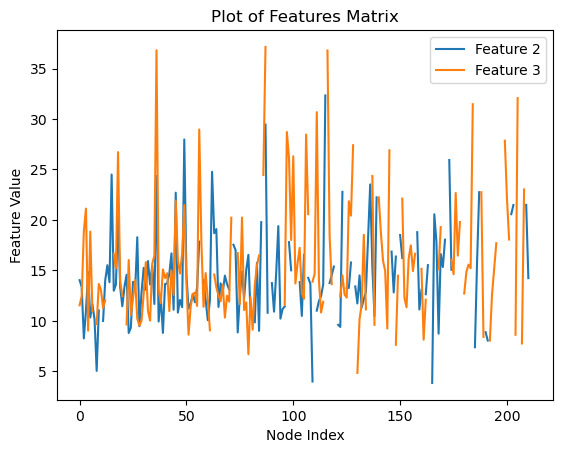

In [ ]:
# Plot features_matrix[2]
plt.plot(features_matrix[:,2], label='Feature 2')

# Plot features_matrix[3]
plt.plot(features_matrix[:,3], label='Feature 3')

# Add labels and title
plt.xlabel('Node Index')
plt.ylabel('Feature Value')
plt.title('Plot of Features Matrix')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [59]:
lables1 = np.zeros((num_nodes, 1))

# Loop through each node
for i, node in enumerate(features_matrix):
    
    traffic_from = 0 if node[2] >= out_threshold else 1
    #traffic_into = 0 if node[3] >= in_threshold else 1
    
    lables1[i] = [traffic_from] 
# Print the features matrix
print(lables1)

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.

In [61]:
out_labels = np.zeros_like(lables1)

out_labels[np.where(lables1[:,0] == 0)] = 0
out_labels[np.where(lables1[:,0] == 1)] = 1

out_labels = out_labels[:,0]

out_labels_df = pd.DataFrame(out_labels)
out_labels_df = out_labels_df.astype(int)
out_labels_df.head()

counts = out_labels_df[0].value_counts()
print(counts)


0    129
1     83
Name: 0, dtype: int64


In [62]:
# Save the attributes to the npz file
np.savez('dataset/traffic/spatial/traffic.npz', adj=A, features=features_matrix, labels=out_labels.astype(int))
